In [1]:
# честно, подсмотрел тут https://habr.com/ru/post/321834/, 
# всё делать не стал - мощностей не хватает и времени
# понравился подход, описанный в статье для генерации бОльших данных из небольшого набора (я уже ситал о таком, но тут увидел живьём)

In [2]:
import numpy as np
import tensorflow as tf

from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.layers import  BatchNormalization

import matplotlib.pyplot as plt

In [3]:
classes = ['котэ', 'пёсель']
image_size = (150, 150)
chanel_n = 3
batch_size = 100

In [4]:
img_transformer = ImageDataGenerator(rescale=1./255)

In [5]:
# в data есть 2 папки train и valid с подпапками изображений (cat и dog)
train_gen = img_transformer.flow_from_directory(
    'data/train', 
    target_size=image_size, 
    batch_size=batch_size, 
    shuffle=False, 
    class_mode='binary'
)

valid_gen = img_transformer.flow_from_directory(
    'data/valid', 
    target_size=image_size, 
    batch_size=batch_size, 
    shuffle=False, 
    class_mode='binary'
)

Found 16000 images belonging to 2 classes.
Found 8998 images belonging to 2 classes.


In [6]:
base_model = applications.VGG16(weights ='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], chanel_n ))

base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [7]:
base_model.trainable = False

model = Sequential()
model.add(base_model)
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dropout(0.5))
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dropout(0.5))
model.add(Dense(1, activation=tf.nn.sigmoid))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
batch_normalization (BatchNo (None, 4, 4, 512)         2048      
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                524352    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [9]:
model.compile(loss=tf.losses.BinaryCrossentropy(), optimizer='rmsprop', metrics=["accuracy"])

In [11]:
'''
hist = model.fit(
    train_gen,
    epochs=15,
    validation_data=valid_gen,
    workers=4,
    verbose=1
)
'''

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 160 steps, validate for 90 steps
Epoch 1/15
159/160 [============================>.] - ETA: 20s - loss: 0.5217 - accuracy: 0.7736

/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

160/160 [==============================] - 5374s 34s/step - loss: 0.5208 - accuracy: 0.7740 - val_loss: 0.8003 - val_accuracy: 0.6327
Epoch 2/15
160/160 [==============================] - 4519s 28s/step - loss: 0.1580 - accuracy: 0.9472 - val_loss: 1.1306 - val_accuracy: 0.6553
Epoch 3/15
160/160 [==============================] - 3235s 20s/step - loss: 0.0976 - accuracy: 0.9722 - val_loss: 0.9993 - val_accuracy: 0.7087
Epoch 4/15
160/160 [==============================] - 2992s 19s/step - loss: 0.0705 - accuracy: 0.9799 - val_loss: 1.4294 - val_accuracy: 0.6885
Epoch 5/15
160/160 [==============================] - 3402s 21s/step - loss: 0.0670 - accuracy: 0.9837 - val_loss: 1.6877 - val_accuracy: 0.6647
Epoch 6/15
160/160 [==============================] - 3095s 19s/step - loss: 0.0607 - accuracy: 0.9847 - val_loss: 1.5323 - val_accuracy: 0.7288
Epoch 7/15
160/160 [==============================] - 3874s 24s/step - loss: 0.0529 - accuracy: 0.9860 - val_loss: 1.9627 - val_accuracy: 0.6

In [12]:
# model.save_weights('model_weights.h5')

In [10]:
model.load_weights('model_weights.h5')

In [11]:
model.evaluate(valid_gen)

  ...
    to  
  ['...']
74/90 [=======================>......] - ETA: 3:07 - loss: 4.2218 - accuracy: 0.6008

/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

90/90 [==============================] - 1053s 12s/step - loss: 3.8206 - accuracy: 0.6481


[3.820637869503763, 0.648144]

In [12]:
# пришлось перезапустить блокнот, т.к. кончилась память - никакой истории тут, конечно, нет, но там всё было грустно
'''
plt.plot(hist.history['val_accuracy'],'r',label='val_accuracy')
plt.plot(hist.history['accuracy'],'g',label='train_accuracy')
plt.legend()
plt.show()
'''

NameError: name 'hist' is not defined

Как-то всё печально

In [13]:
# попробуем немного иначе
# загрузим готовые веса и попробуем обучить модель, используя SGD (он, вроде бы, менее агрессивный... чуть более тонкая настройка)
base_model.trainable = False

model = Sequential()
model.add(base_model)
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dropout(0.25))
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dropout(0.25))
model.add(Dense(1, activation=tf.nn.sigmoid))

In [14]:
model.compile(loss=tf.losses.BinaryCrossentropy(), optimizer='SGD', metrics=["accuracy"])

In [15]:
model.load_weights('model_weights.h5')

In [16]:
hist = model.fit(
    train_gen,
    epochs=3,
    validation_data=valid_gen,
    workers=4,
    verbose=1
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 160 steps, validate for 90 steps
Epoch 1/3
159/160 [============================>.] - ETA: 12s - loss: 0.0069 - accuracy: 0.9982

/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

160/160 [==============================] - 2978s 19s/step - loss: 0.0069 - accuracy: 0.9983 - val_loss: 3.3843 - val_accuracy: 0.6710
Epoch 2/3
160/160 [==============================] - 3721s 23s/step - loss: 0.0049 - accuracy: 0.9989 - val_loss: 3.3296 - val_accuracy: 0.6755
Epoch 3/3
160/160 [==============================] - 3433s 21s/step - loss: 0.0048 - accuracy: 0.9989 - val_loss: 3.1886 - val_accuracy: 0.6862


In [17]:
model.evaluate(valid_gen)

  ...
    to  
  ['...']
90/90 [==============================] - 1075s 12s/step - loss: 3.1886 - accuracy: 0.6862


[3.1886267807748583, 0.68615246]

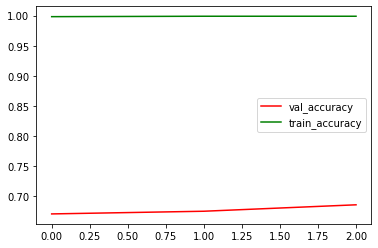

In [18]:
plt.plot(hist.history['val_accuracy'],'r',label='val_accuracy')
plt.plot(hist.history['accuracy'],'g',label='train_accuracy')
plt.legend()
plt.show()

Графики выглядят не очень, точность модели низковата. Хотя ситуация изменилась в лучшую сторону (прошлый результат был ниже) всего за 3 эпохи.  
Думаю, нужно получше поделить данные и добавить аугментацию, чтобы расширить обучающую выборку. К сожалению, на моём железе 15 эпох обучения модели занимают около 8-10 часов, что довольно долго.  